In [1]:
import pandas as pd
import sklearn

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
if __name__ == '__main__':

   dt_heard = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/heart.csv')
   print(dt_heard.head(10))
   print('='*50)
   print(dt_heard['target'].describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

In [3]:
#entrenando nuetro dataset heard 
X = dt_heard.drop(['target'], axis=1)
y = dt_heard['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [4]:
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
boos_pred = boost.predict(X_test)
print('='*68)
print(accuracy_score(boos_pred, y_test))

0.9108635097493036


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

/home/jhonfypy/anaconda3/envs/Scikit-learni-envjf/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/jhonfypy/anaconda3/envs/Scikit-learni-envjf/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC
Accuracy: 0.8133704735376045
SVC
Accuracy: 0.6880222841225627
SGDClassifier
Accuracy: 0.6796657381615598
DecisionTreeClassifier
Accuracy: 0.9554317548746518
GradientBoostingClassifier
Accuracy: 0.9331476323119777


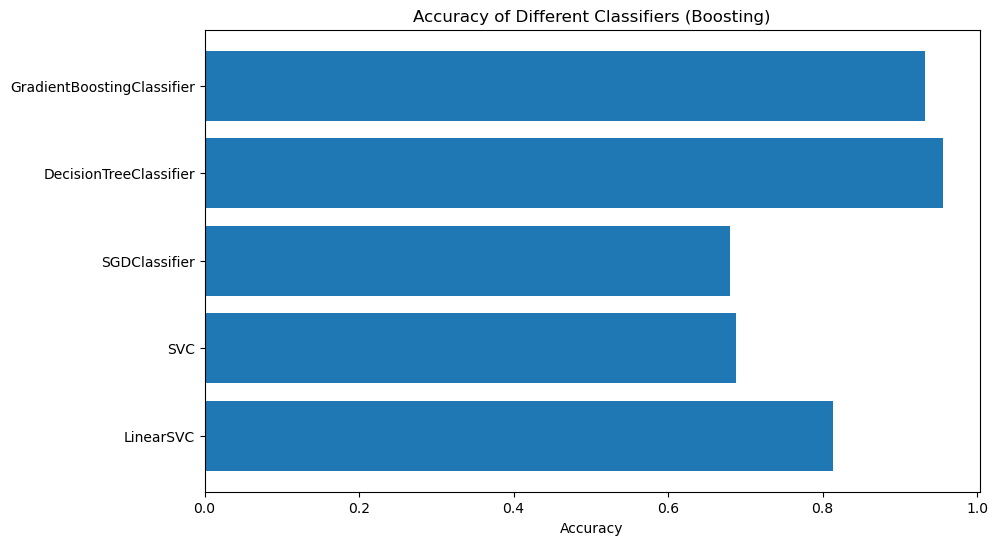

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
dt_heart = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/heart.csv')
print(dt_heart.head(10))
print('='*50)
print(dt_heart['target'].describe())

# Dividir los datos en características (X) y etiquetas (y)
X = dt_heart.drop(['target'], axis=1)
y = dt_heart['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Lista de clasificadores
classifiers = [
    ("LinearSVC", LinearSVC()),
    ("SVC", SVC()),
    ("SGDClassifier", SGDClassifier()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=50))
]

# Entrenar y evaluar cada clasificador
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    print('='*68)
    print(name)
    print(f"Accuracy: {accuracy}")

# Gráficos de los resultados
fig, ax = plt.subplots(figsize=(10, 6))
names = [name for name, _ in classifiers]
scores = [accuracy_score(classifier.predict(X_test), y_test) for _, classifier in classifiers]
ax.barh(names, scores)
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of Different Classifiers (Boosting)')
plt.show()


## El Boosting 
es una técnica de aprendizaje automático utilizada para mejorar el rendimiento de los modelos de aprendizaje automático. Su objetivo principal es combinar varios modelos débiles para crear un modelo fuerte que sea más preciso y generalizable.

#### Aquí hay una explicación detallada de cómo funciona la implementación del Boosting:

## Modelos Débiles: 
- En el contexto del Boosting, un modelo débil se refiere a un clasificador o regresor que tiene un rendimiento ligeramente mejor que el azar, pero aún no es lo suficientemente bueno. Puede ser un simple árbol de decisión, un clasificador lineal débil, o cualquier otro modelo que tenga un rendimiento modesto.

## Entrenamiento Iterativo: 
- El proceso de Boosting implica entrenar una secuencia de modelos débiles de manera iterativa. En cada iteración, se entrena un nuevo modelo débil, que se enfoca en corregir los errores cometidos por los modelos anteriores.

## Pesos de las Instancias: 
- Cada instancia en el conjunto de entrenamiento se asocia con un peso que indica su importancia relativa. Inicialmente, todos los pesos son iguales. Sin embargo, después de cada iteración, los pesos de las instancias mal clasificadas se aumentan para que el próximo modelo débil se enfoque en ellas.

## Combinación de modelos: 
- Después de entrenar todos los modelos débiles, sus resultados se combinan para formar una predicción final. La combinación se realiza ponderando las predicciones de cada modelo según su rendimiento y asignándoles un peso.

## Votación Ponderada: 
- En clasificación, la combinación de predicciones puede ser a través de una votación ponderada, donde los modelos que tienen un mejor rendimiento tienen un mayor peso en la votación final. En regresión, las predicciones pueden promediarse ponderadamente.

## Prevención del Sobreajuste: 
- El proceso de Boosting puede continuar hasta que se alcance un número predefinido de modelos débiles o hasta que no se observe ninguna mejora en el rendimiento en el conjunto de validación. Esto evita el sobreajuste y garantiza que el modelo final generalice bien a nuevos datos.

## Ejemplos de algoritmos de Boosting: 
- Algunos de los algoritmos de Boosting más populares son AdaBoost (Adaptive Boosting), Gradient Boosting y XGBoost. Cada uno tiene sus propias particularidades y variaciones en el proceso de entrenamiento y combinación de modelos.

## Beneficios: 
- Boosting puede mejorar significativamente el rendimiento de los modelos débiles y generar un modelo final que generalmente es más preciso que los modelos individuales. También es menos probable al sobreajuste en comparación con los modelos individuales.

En resumen, el Boosting es una técnica que combina modelos débiles en un modelo fuerte mediante un proceso iterativo de entrenamiento y asignación de pesos a las instancias. Esta técnica es efectiva para mejorar la precisión de los modelos y es ampliamente utilizada en el campo del aprendizaje automático.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

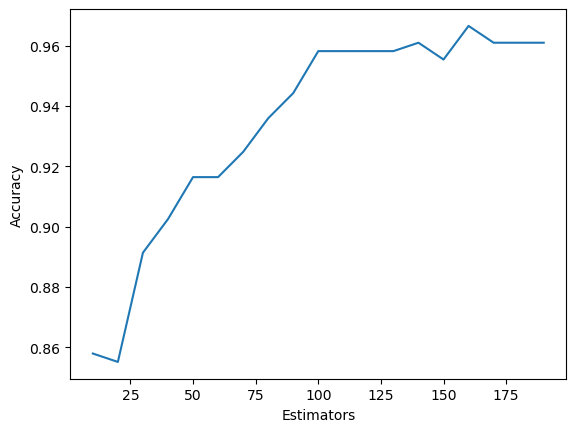

0.9665738161559888


<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

if __name__ == '__main__':

   dt_heard = pd.read_csv('/home/jhonfypy/CursoML_Scikit_learni_jf/heart.csv')
   print(dt_heard.head(10))
   print('='*50)
   print(dt_heard['target'].describe())

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35)

estimators = range(10, 200, 10)
total_accuracy = []
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy.append(accuracy_score(y_test, boost_pred))

plt.plot(estimators, total_accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Boost.png')

print(np.array(total_accuracy).max())